In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import tables
from phd.utils.convertor_tools import direction_to_degree
from scipy.interpolate import UnivariateSpline
from phd.utils.path_tools import find_by_meta

In [2]:
import sys
sys.path

['/home/zelenyy/npm/phd/phd-code/notebooks',
 '/home/zelenyy/ROOT/ROOT6_install/lib',
 '/home/zelenyy/miniconda3/envs/phd-code/lib/python37.zip',
 '/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7',
 '/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/lib-dynload',
 '',
 '/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages',
 '/home/zelenyy/npm/dataforge/dataforge-python',
 '/home/zelenyy/npm/phd/phd-code/python',
 '/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/IPython/extensions',
 '/home/zelenyy/.ipython']

In [5]:
def process(path):
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector_number")
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_number"])
            energy.append(table.attrs["values_energy"])
            theta.append(direction_to_degree(table.attrs["values_direction"]))
    return theta, energy, probability
        
        # plt.hist(data["energy"])

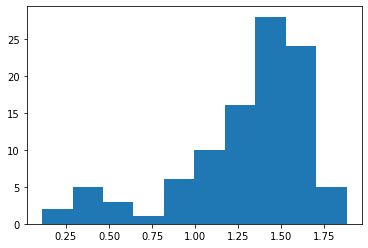

In [5]:
process(path)

In [10]:
process(path)

0.12


In [9]:

path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/test_reversed.hdf5"
theta, energy, probability = process(path)


In [5]:
plt.plot(theta, energy, ".")

NameError: name 'theta' is not defined

In [10]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability)

In [11]:
%matplotlib qt

e_par = energy*np.cos(np.deg2rad(theta))
e_per = energy*np.sin(np.deg2rad(theta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e_per, e_par, probability)
ax.set_xlabel("Perpenducilar")
ax.set_ylabel("Parrallel")

Text(0.5, 0, 'Parrallel')

In [2]:
path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/test_reversed_grid.hdf5"

In [3]:
def process(path):
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector_number")
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_macros_number"])
            energy.append(table.attrs["values_macros_energy"])
            theta.append(direction_to_degree(table.attrs["values_macros_direction"]))
    return np.array(theta), np.array(energy), np.array(probability)

In [4]:
theta, energy, probability = process(path)

In [9]:
indx = probability < 0.05
print(indx.sum())
print(energy[indx], theta[indx])

9
[0.7  0.75 0.8  0.85 0.85 0.9  0.95 1.   1.  ] [90.         79.97953045 90.         79.97953045 90.         90.
 90.         70.00122819 79.97953045]


In [18]:
with tables.open_file(path) as h5file:
        table = h5file.get_node("/sim0001/particle_detector_number")
        print(repr(table.attrs))

/sim0001/particle_detector_number._v_attrs (AttributeSet), 16 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'electron',
    NROWS := 1000,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0001',
    text := '/df/project test\n/df/gdml .././gdml/0.gdml\n/thunderstorm/physics standard_opt_4\n/thunderstorm/stacking particle_cylinder\n/thunderstorm/addParticleInPCS gamma\n/thunderstorm/addParticleInPD e-\n/thunderstorm/cut/energy 0.05\n\n/gps/particle e-\n/gps/number 1\n/gps/direction 0.0 0 1.0\n/gps/ene/mono 0.1 MeV\n/gps/position 0. 0. 0. m\n/run/beamOn 1000\n',
    values_gdml_fieldValueZ := 0.0005,
    values_gdml_height := 0,
    values_macros_cut := 0.05,
    values_macros_direction := '0.0 0 1.0',
    values_macros_energy := 0.1,
    values_macros_number := 1000,
    values_macros_path := '.././gdml/0.gdml',
    values_time := 7.276944205164909]


In [5]:
X = theta.reshape(19,10)
Y = energy.reshape(19,10)
Z = probability.reshape((19,10))

In [42]:
inter = interp2d(theta, energy, probability, kind="linear")


/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=14,18 m=190 fp=0.032097 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


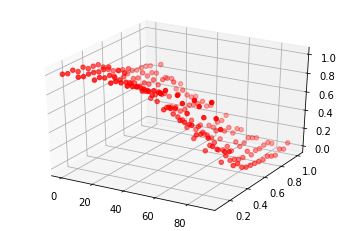

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability, c="r")

<a list of 6 text.Text objects>

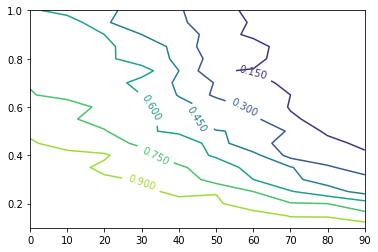

In [6]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

## Данные для разных полей

In [25]:
def process(path, field=8e-4):
    paths = find_by_meta(path,target_node="particle_detector_number", values_gdml_fieldValueZ=field)
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for path_node in paths:
            table = h5file.get_node(path_node)
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_macros_number"])
            energy.append(table.attrs["values_macros_energy"])
            theta.append(direction_to_degree(table.attrs["values_macros_direction"]))
    return np.array(theta), np.array(energy), np.array(probability)

In [23]:
def plot(path, field=8e-4):
    theta, energy, probability = process(path, field)
    X = theta.reshape(19,10)
    Y = energy.reshape(19,10)
    Z = probability.reshape((19,10))
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10);
    ax.set_title("Field {} kV/cm".format(field*1e4))

In [42]:
path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_1.hdf5"


In [19]:
fields = get_attrs_values(path, "values_gdml_fieldValueZ")

In [20]:
print(fields)

{0.0009000000000000001, 0.0006500000000000001, 0.0008500000000000001, 0.00055, 0.0008, 0.001, 0.0007, 0.00095, 0.0006000000000000001, 0.00075, 0.0005}


In [22]:
fields = sorted(list(fields))

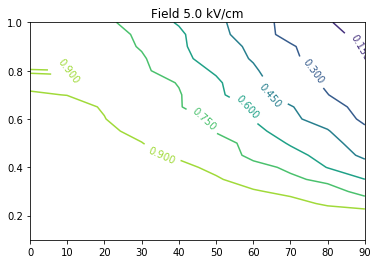

In [26]:
plot(path, fields[0])

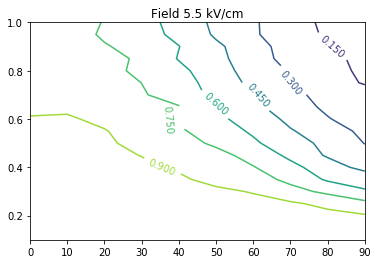

In [27]:
plot(path, fields[1])

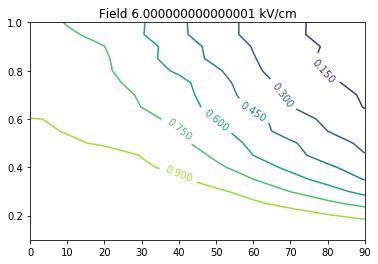

In [28]:
plot(path, fields[2])

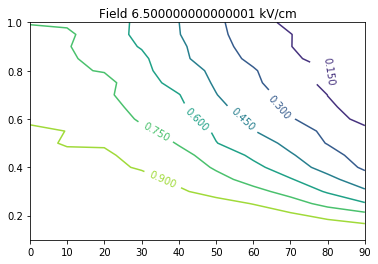

In [29]:
plot(path, fields[3])

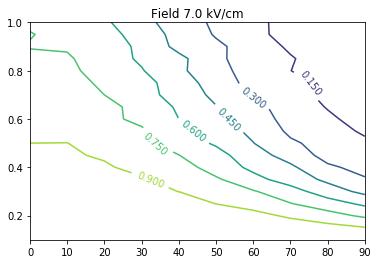

In [30]:
plot(path, fields[4])

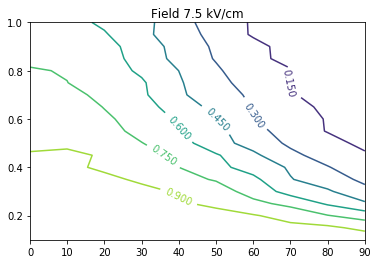

In [31]:
plot(path, fields[5])

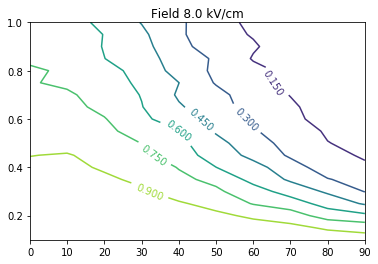

In [32]:
plot(path, fields[6])

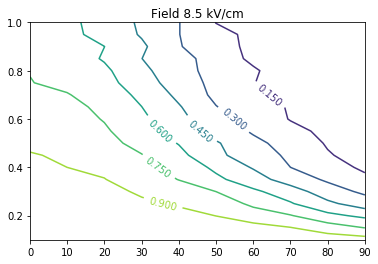

In [33]:
plot(path, fields[7])

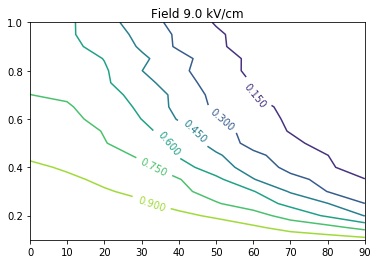

In [34]:
plot(path, fields[8])

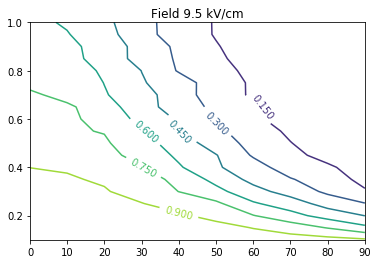

In [35]:
plot(path, fields[9])

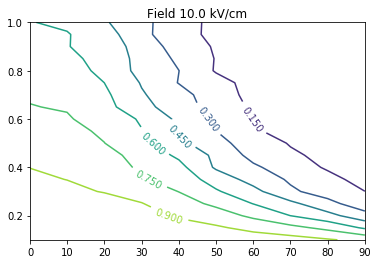

In [36]:
plot(path, fields[10])

In [44]:
path2 = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_2.hdf5"

In [64]:
def plot_2(path1, path2, field=8e-4):
    theta1, energy1, probability1 = process(path, field)
    theta2, energy2, probability2 = process(path2, field)
    theta = np.hstack((theta1, theta2))
    energy = np.hstack((energy1, energy2))
    probability = np.hstack((probability1, probability2))
    xi = np.sort(np.unique(theta))
    yi = np.sort(np.unique(energy))
    X,Y = np.meshgrid(xi,yi)
    Z = np.zeros(X.shape)
    for t, e, p in zip(theta, energy, probability):
        indx = np.where(xi == t)[0][0]
        indy = np.where(yi == e)[0][0]
        Z[indy, indx] = p
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10);
    ax.set_title("Field {} kV/cm".format(field*1e4))

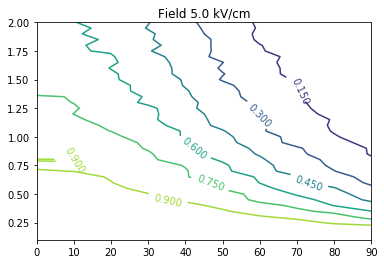

In [65]:
plot_2(path, path2, fields[0])

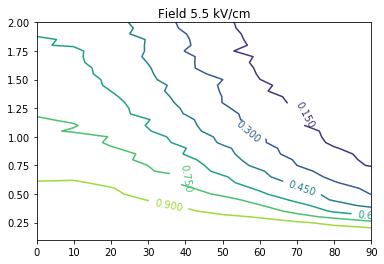

In [66]:
plot_2(path, path2, fields[1])

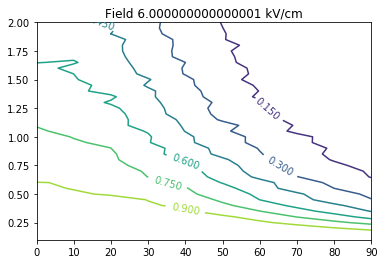

In [67]:
plot_2(path, path2, fields[2])

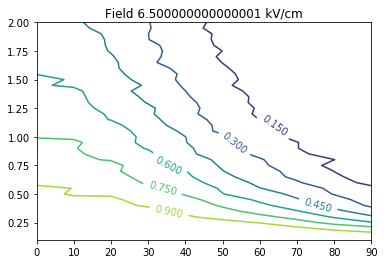

In [68]:
plot_2(path, path2, fields[3])

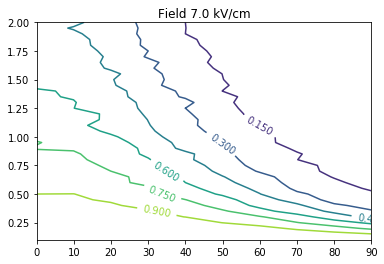

In [69]:
plot_2(path, path2, fields[4])

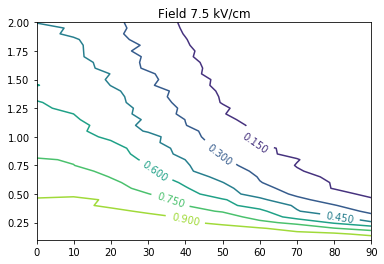

In [70]:
plot_2(path, path2, fields[5])

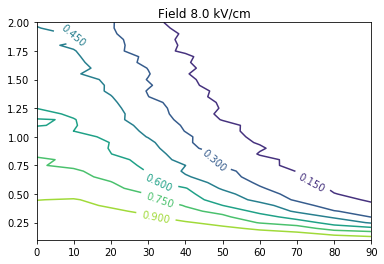

In [71]:
plot_2(path, path2, fields[6])

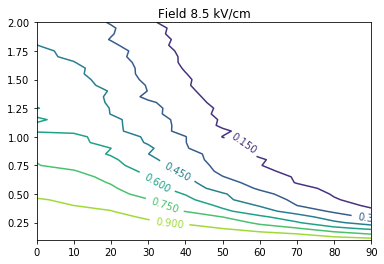

In [72]:
plot_2(path, path2, fields[7])

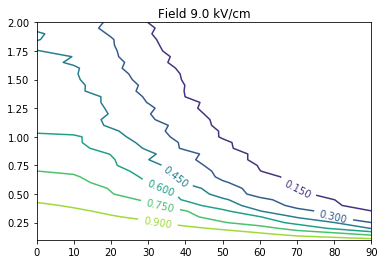

In [73]:
plot_2(path, path2, fields[8])

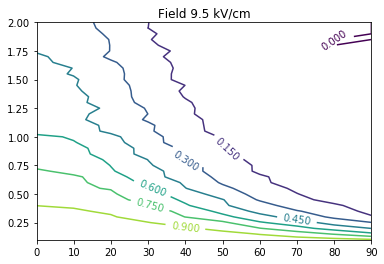

In [74]:
plot_2(path, path2, fields[9])

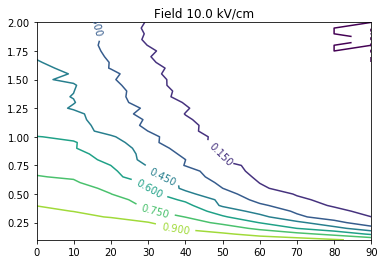

In [75]:
plot_2(path, path2, fields[10])